In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imtools 
from PIL import Image
from scipy.ndimage import filters

In [2]:
plt.style.use('dark_background')

In [3]:
def compute_harris_response(img, sigma=3):
    """
    Compute thte Harris corner detector response function for each pixel in a graylevel image.
    """
    
    # derivatives
    img_x = np.zeros(img.shape)
    filters.gaussian_filter(img, (sigma, sigma), (0,1), img_x)

    img_y = np.zeros(img.shape)
    filters.gaussian_filter(img, (sigma, sigma), (1,0), img_y)

    # compute components of the harris matrix
    W_xx = filters.gaussian_filter(img_x*img_x, sigma)
    W_xy = filters.gaussian_filter(img_x*img_y, sigma)
    W_yy = filters.gaussian_filter(img_y*img_y, sigma)

    # determinant and trace
    W_det = W_xx*W_yy - W_xy**2
    W_tr = W_xx + W_yy
    
    return W_det / W_tr

In [4]:
def get_points(response, min_dist = 10, threshold_percent = 0.1):
    """
    Return corners from a response image
    min_dist ist the minumum number of pixels sperating corners
    and image boundary.
    """
    
    # find top corner caditades above a threshold
    threshold = response.max() * threshold_percent
    response_threshold = imtools.threshold(response, threshold)

    # get coordinates of candidates
    coords = np.array(response_threshold.nonzero()).T
    
    # ... and their values
    candidate_values = [response[c[0], c[1]] for c in coords]
    
    # sort candidates
    index = np.argsort(candidate_values)
    
    # store allowed point locations in array
    allowed_locations = np.zeros(response.shape)
    allowed_locations[min_dist:-min_dist, min_dist:-min_dist] = 1
    
    # select the best points taking min_distance into account
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i,0], coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist),
                             (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    
    return filtered_coords

In [5]:
def plot_points(image, filtered_coords, size=(10,10), save=False):
    """
    Plots corners found in image
    """
    plt.figure(figsize=size)
    plt.imshow(image)
    plt.plot([p[1] for p in filtered_coords], [p[0] for p in filtered_coords], 'r*')
    plt.axis('off')
    plt.title('harris points')
    if save:
        plt.savefig('result_images/harris_points.jpg')

In [6]:
fname = 'bearing_scrached_fuji_tunnel.jpg'
Img = Image.open('test_images/'+ fname).convert('L')

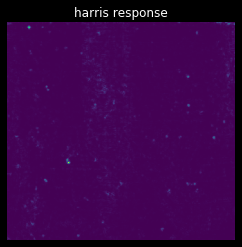

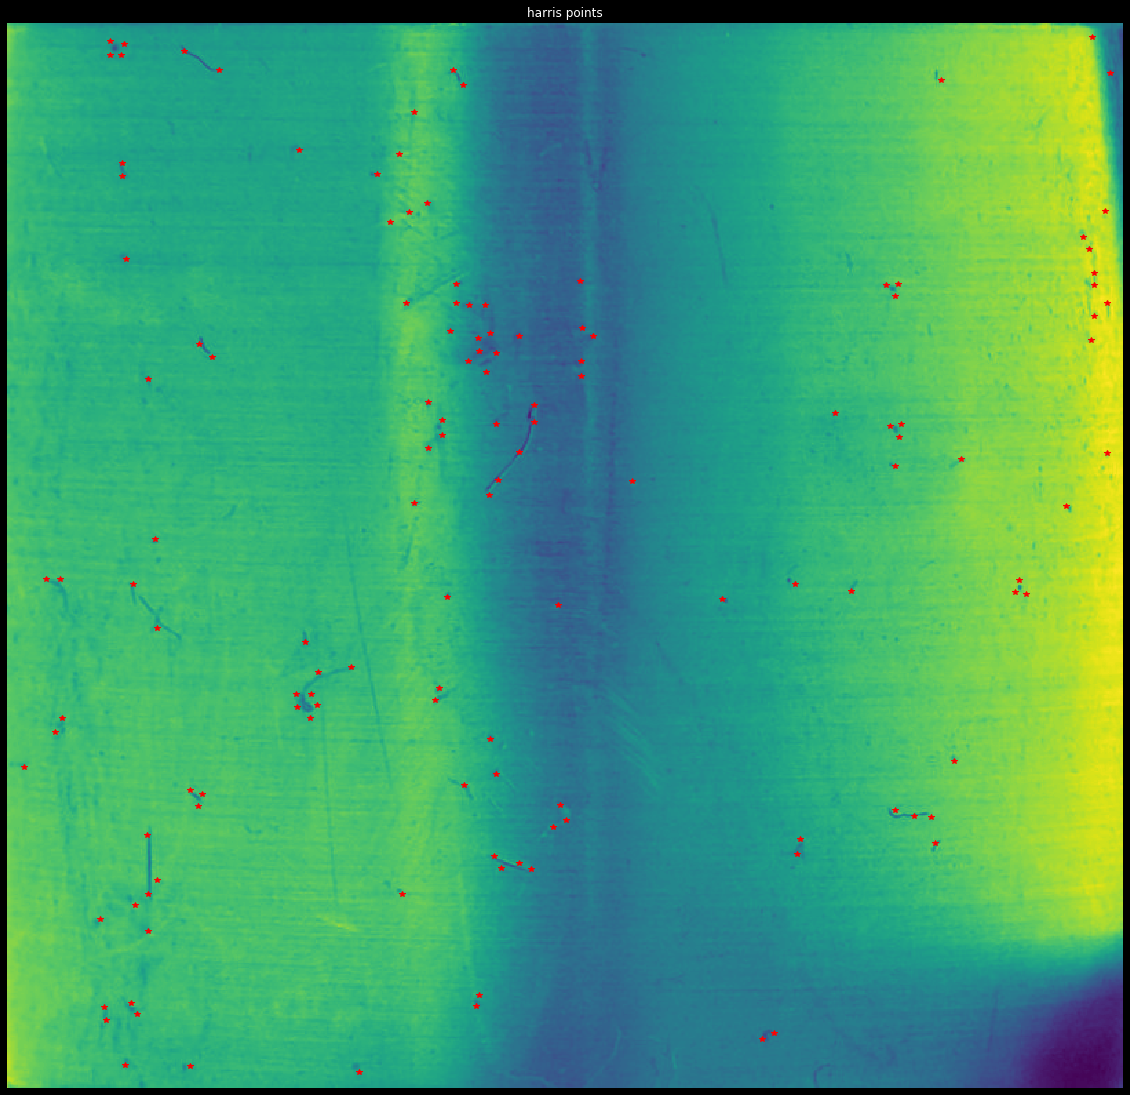

In [7]:
img = np.array(Img)
harris_response = compute_harris_response(img, sigma=2)
plt.figure()
plt.imshow(harris_response)
plt.axis('off')
plt.title('harris response')

hattis = points =get_points(harris_response, min_dist = 8, threshold_percent = 0.07)
plot_points(img, points, size=(20,20), save=True)
